In [5]:
# Εισαγωγή απαραίτητων βιβλιοθηκών
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [6]:
symbol = 'AAPL'  # Παράδειγμα με μετοχή Apple
start_date = '2018-11-30'
end_date = '2023-11-30'
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [7]:
# Καθαρισμός και επεξεργασία δεδομένων
df.dropna(inplace=True) # Διαγραφή απουσιάζουσων τιμών
df['Return'] = df['Close'].pct_change() # Υπολογισμός ημερήσιας απόδοσης
df = df.reset_index()

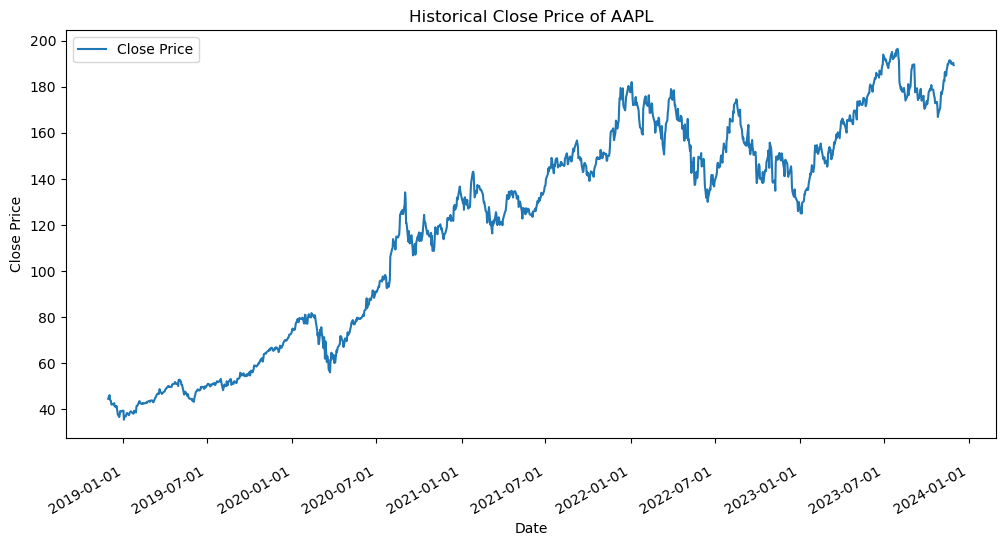

In [8]:
plt.figure(figsize=(12, 6))
# Make sure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Plot 'Close' column against 'Date' column
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Historical Close Price of AAPL')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate the dates for better readability

# Improve the date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set major ticks to be every 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))

# Reduce the number of date labels shown
plt.gca().xaxis.set_tick_params(which='major', pad=15)

plt.show()

In [9]:
# Δημιουργία μεταβλητών για το μοντέλο μηχανικής μάθησης
df['Previous_Close'] = df['Close'].shift(1) # Τιμή κλεισίματος προηγούμενης ημέρας
df.dropna(inplace=True) # Διαγραφή απουσιάζουσων τιμών μετά τη μετατόπιση

In [10]:
# Διαχωρισμός σε σετ εκπαίδευσης και δοκιμής
X = df[['Date', 'Previous_Close']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [11]:
# Εκπαίδευση του μοντέλου
model = LinearRegression()
model.fit(X_train.drop('Date', axis=1), y_train)

LinearRegression()

In [12]:
# Πρόβλεψη τιμών
predictions = model.predict(X_test.drop('Date', axis=1))

In [13]:
# Αξιολόγηση του μοντέλου
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 5.1452285628148715
MAE: 1.7473207387118779


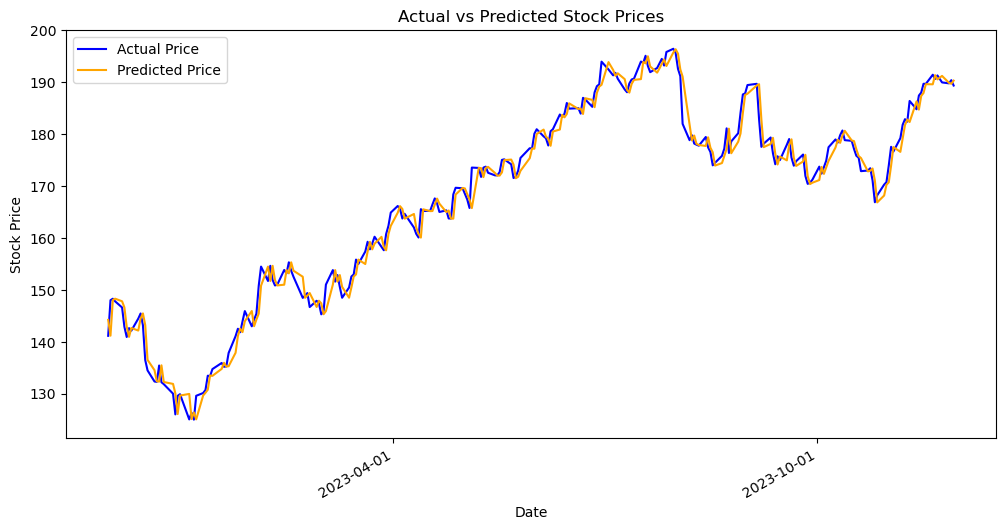

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(X_test['Date'], y_test, color='blue', label='Actual Price')  # Actual prices
plt.plot(X_test['Date'], predictions, color='orange', label='Predicted Price')  # Predicted prices
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Auto-rotate dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set ticks every 6 months

plt.show()